# .............................PACIFIC CYCLONE PREDICTION................................

### Task Involves

### 1 - Data gathering
### 2-  Data loading
### 3 - data pre-processing
### 4 - Exploratory data analysis
### 5 - Random forest feature selection
### 6 - Random forest algorithm 
### 7 - Decision tree feature importance
### 8 - Principal compount analysis
### 9 - Multinominal logistics regression
### 10 - ROC score
### 11 - log loss score

In [9]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data analysis and manuplation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline
# Ignore Warnings.
import warnings # import warnings
warnings.filterwarnings("ignore")

In [10]:
# loading dataset
data=pd.read_csv('pacific.csv') # read pacific dataset 
data.head() # showing top 5 records

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


# Data Pre-Processing

In [11]:
data.info() # getting information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

In [12]:
data.isnull().sum() # finding null values, Fortunatly there is no null values

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [13]:
data.Latitude.tail() # getting latitude features

26132    21.7N
26133    22.4N
26134    23.1N
26135    23.5N
26136    24.2N
Name: Latitude, dtype: object

In [14]:
data.shape # shape of the dataset

(26137, 22)

In [15]:
# import regelar expression for seperate string in latitude
import re
def hemisphere(seperation):# function for seperation
        hem = re.findall(r'[NSWE]' ,seperation)[0]# find all nswe in data
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

In [16]:
data['Latitude_Hemisphere'] = data['Latitude'].apply(hemisphere)# apply hemisphere function in latitude 
data['Longitude_Hemisphere'] = data['Longitude'].apply(hemisphere)# apply same hemisphere function in longitude

In [17]:
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1


In [18]:
data.Latitude_Hemisphere.unique()# finding unique value for seperated columns latitude hemisphere

array([0], dtype=int64)

In [19]:
data.Longitude_Hemisphere.unique()# finding unique value for seperated columns longitude_hemisphere

array([1, 0], dtype=int64)

In [20]:
data['Latitude'] =  data['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
data['Longitude'] =   data['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])


In [21]:
# finding data types of each columns
data.dtypes

ID                      object
Name                    object
Date                     int64
Time                     int64
Event                   object
Status                  object
Latitude                object
Longitude               object
Maximum Wind             int64
Minimum Pressure         int64
Low Wind NE              int64
Low Wind SE              int64
Low Wind SW              int64
Low Wind NW              int64
Moderate Wind NE         int64
Moderate Wind SE         int64
Moderate Wind SW         int64
Moderate Wind NW         int64
High Wind NE             int64
High Wind SE             int64
High Wind SW             int64
High Wind NW             int64
Latitude_Hemisphere      int64
Longitude_Hemisphere     int64
dtype: object

In [22]:
# change the date formate and date dtypes
data['Date'] = pd.to_datetime(data['Date'] , format= '%Y%m%d')

In [23]:
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2,106.3,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2,106.4,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2,106.7,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3,107.7,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4,108.6,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1


In [24]:
data.dtypes # checking wheather date types is changed or not

ID                              object
Name                            object
Date                    datetime64[ns]
Time                             int64
Event                           object
Status                          object
Latitude                        object
Longitude                       object
Maximum Wind                     int64
Minimum Pressure                 int64
Low Wind NE                      int64
Low Wind SE                      int64
Low Wind SW                      int64
Low Wind NW                      int64
Moderate Wind NE                 int64
Moderate Wind SE                 int64
Moderate Wind SW                 int64
Moderate Wind NW                 int64
High Wind NE                     int64
High Wind SE                     int64
High Wind SW                     int64
High Wind NW                     int64
Latitude_Hemisphere              int64
Longitude_Hemisphere             int64
dtype: object

In [25]:
# we can see the data contains -999 values more often , these are duplicate values,
#need to change those values with appropriate values
for column in data.columns: # for loop for iterating in all columns
    missing_cnt = data[column][data[column] == -999].count() # assigning missing_cnt for data is -999 count
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt ) # print missing column and count 
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(data[column][data[column] != -999 ].mean())# taking mean value except -999,
#         because we need to fill those mean value in -999
#         print("mean",mean)
        index = data.loc[data[column] == -999 , column].index
#         print("index" , index )
        data.loc[data[column] == -999 , column] = mean# filling with mean value
#         print(df.loc[index , column])

Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Event =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  12804
Missing Values in column Low Wind NE =  19750
Missing Values in column Low Wind SE =  19750
Missing Values in column Low Wind SW =  19750
Missing Values in column Low Wind NW =  19750
Missing Values in column Moderate Wind NE =  19750
Missing Values in column Moderate Wind SE =  19750
Missing Values in column Moderate Wind SW =  19750
Missing Values in column Moderate Wind NW =  19750
Missing Values in column High Wind NE =  19750
Missing Values in column High Wind SE =  19750
Missing Values in column High Wind SW =  19750
Missing Values in column High Wind NW =  19750
Missing Values in column Latitude_Hemisp

In [26]:
data.Event.unique() # n unique in event 

array(['  ', ' L', ' I', ' S', ' T'], dtype=object)

In [27]:
df = data.drop(columns=["ID","Name","Date","Time","Event"]) # drop some unwanted columns, this is not useful while predict the cyclone

In [28]:
df.dtypes # checking dtypes

Status                  object
Latitude                object
Longitude               object
Maximum Wind             int64
Minimum Pressure         int64
Low Wind NE              int64
Low Wind SE              int64
Low Wind SW              int64
Low Wind NW              int64
Moderate Wind NE         int64
Moderate Wind SE         int64
Moderate Wind SW         int64
Moderate Wind NW         int64
High Wind NE             int64
High Wind SE             int64
High Wind SW             int64
High Wind NW             int64
Latitude_Hemisphere      int64
Longitude_Hemisphere     int64
dtype: object

In [29]:
df['Latitude'] = data['Latitude'].astype('float')# changing data types from object to int for latitude
df['Longitude'] = data['Longitude'].astype('float')# changing data types from object to int for longitude

In [30]:
df.dtypes# now we can the dtypes are changed

Status                   object
Latitude                float64
Longitude               float64
Maximum Wind              int64
Minimum Pressure          int64
Low Wind NE               int64
Low Wind SE               int64
Low Wind SW               int64
Low Wind NW               int64
Moderate Wind NE          int64
Moderate Wind SE          int64
Moderate Wind SW          int64
Moderate Wind NW          int64
High Wind NE              int64
High Wind SE              int64
High Wind SW              int64
High Wind NW              int64
Latitude_Hemisphere       int64
Longitude_Hemisphere      int64
dtype: object

In [31]:
# exploring target variables
df.Status.value_counts()

 TS     10076
 TD      6965
 HU      6765
 LO      1828
 DB       217
 ET       152
 EX       110
 SS         7
 PT         6
 ST         6
 SD         4
 HU         1
Name: Status, dtype: int64

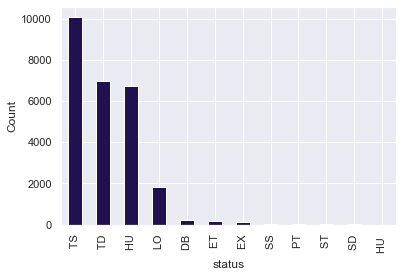

In [32]:
# visualizing our target variables
import seaborn as sns # seaborn
palette=sns.color_palette('magma') # assigning magma colour in palette
sns.set(palette=palette) # colour
df['Status'].value_counts().plot(kind='bar')# count 
plt.xlabel('status')# x label
plt.ylabel('Count')# y label
plt.show()# plotting

In [33]:
# replace target variable string into number
replace_map = {'Status': {'TS': 1, 'TD': 2, 'HU': 3, 'LO': 4,
                                  'DB': 5, 'ET': 6, 'EX': 7 , 'SS': 8 , 'ST': 9,'PT': 10,'SD': 11}}

In [34]:
#Setting assigns new values to each category (effectively a rename of each individual category).
labels = df['Status'].astype('category').cat.categories.tolist()
replace_map_comp = {'Status' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)# replace those values with number

{'Status': {' DB': 1, ' ET': 2, ' EX': 3, ' HU': 4, ' HU ': 5, ' LO': 6, ' PT': 7, ' SD': 8, ' SS': 9, ' ST': 10, ' TD': 11, ' TS': 12}}


In [35]:
df.replace(replace_map_comp, inplace=True)

print(df.head())

   Status  Latitude  Longitude  Maximum Wind  Minimum Pressure  Low Wind NE  \
0      12      20.2      106.3            45               995           40   
1      12      20.2      106.4            45               995           40   
2      12      20.2      106.7            45               995           40   
3      12      20.3      107.7            45               995           40   
4      12      20.4      108.6            45               995           40   

   Low Wind SE  Low Wind SW  Low Wind NW  Moderate Wind NE  Moderate Wind SE  \
0           35           27           35                13                11   
1           35           27           35                13                11   
2           35           27           35                13                11   
3           35           27           35                13                11   
4           35           27           35                13                11   

   Moderate Wind SW  Moderate Wind NW  High 

In [36]:
print(df['Status'].dtypes)# checking data types

int64


In [37]:
# some variables in our target are not necessary to predict the cyclone, these values are below 10.
# thus, need to remove for handiling im balance and bias
# so i removed from target
# i take 12, 11,4,6 to predict because thses occured more often.
df.drop(df[df['Status']==1].index, inplace = True)
df.drop(df[df['Status']==2].index, inplace = True)
df.drop(df[df['Status']==3].index, inplace = True)
df.drop(df[df['Status']==5].index, inplace = True)
df.drop(df[df['Status']==7].index, inplace = True)
df.drop(df[df['Status']==8].index, inplace = True)
df.drop(df[df['Status']==9].index, inplace = True)
df.drop(df[df['Status']==10].index, inplace = True)

In [38]:
df.Status.value_counts()# checking value count for selected target variables

12    10076
11     6965
4      6765
6      1828
Name: Status, dtype: int64

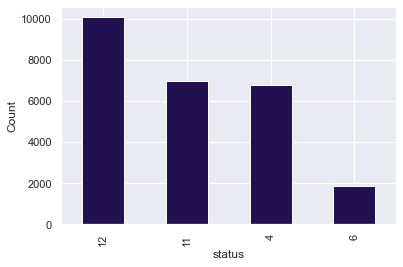

In [39]:
# visualizing again after removed few unwanted variables
import seaborn as sns
palette=sns.color_palette('magma')
sns.set(palette=palette)
df['Status'].value_counts().plot(kind='bar')
plt.xlabel('status')
plt.ylabel('Count')
plt.show()

In [40]:
# renamed that target variables to understantable formate
#Tropical storm-34 to 63 knots  - 12    
#Tropical depression-v< 34 knots  - 11  
#hurricane- > 64 knots  - 4             
#no cyclone     - 6                     
df.Status.replace((12,11,4,6),('Tropical storm-34 to 63 knots','Tropical depression-v< 34 knots','hurricane- > 64 knots','no cyclone'),inplace=True)

In [41]:
df.Status.value_counts()# checking value counts after assigning

Tropical storm-34 to 63 knots      10076
Tropical depression-v< 34 knots     6965
hurricane- > 64 knots               6765
no cyclone                          1828
Name: Status, dtype: int64

In [42]:
df.head()# checking the data, now everything is ready for fitting the model

,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,Tropical storm-34 to 63 knots,20.2,106.3,45,995,40,35,27,35,13,11,9,11,5,4,3,5,0,1
1,Tropical storm-34 to 63 knots,20.2,106.4,45,995,40,35,27,35,13,11,9,11,5,4,3,5,0,1
2,Tropical storm-34 to 63 knots,20.2,106.7,45,995,40,35,27,35,13,11,9,11,5,4,3,5,0,1
3,Tropical storm-34 to 63 knots,20.3,107.7,45,995,40,35,27,35,13,11,9,11,5,4,3,5,0,1
4,Tropical storm-34 to 63 knots,20.4,108.6,45,995,40,35,27,35,13,11,9,11,5,4,3,5,0,1


# Exploratory data analysis

### Univariate analysis

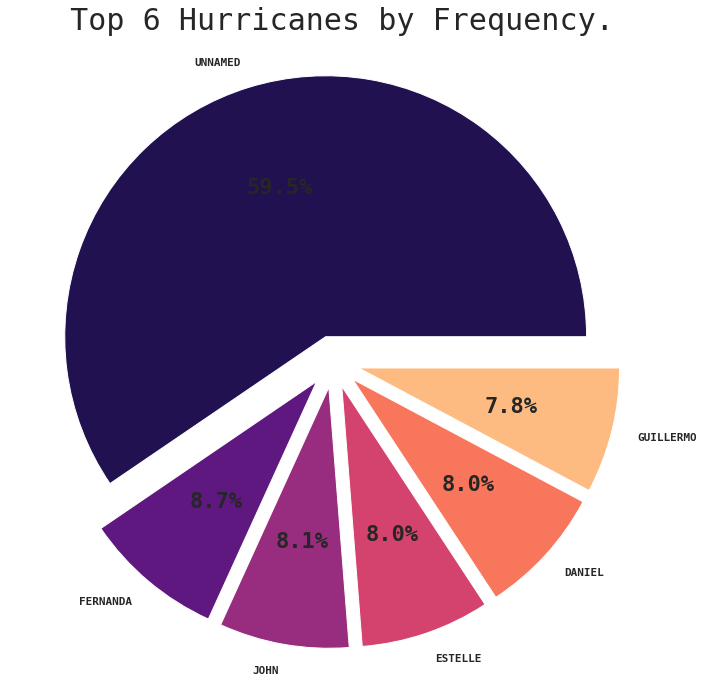

In [43]:
# Find the top ten cyclones which have occured the maximum number of times in percentage
lst = [x.strip() for x in data.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[:6]]
val = data.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[:6]['Date'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(6)])
plt.title(' Top 6 Hurricanes by Frequency.' , fontsize = 30)
plt.show()

Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

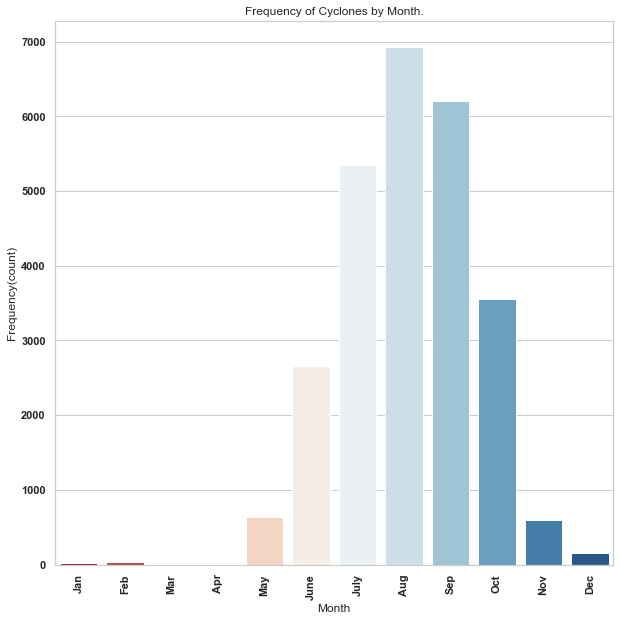

In [44]:
# visualizing the cyclone accurance in each month 
data['Month'] = data['Date'].apply(lambda x: x.month) # assign months name in each number with lambda function
data['Year'] = data['Date'].apply(lambda x: x.year)# year
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = data.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency(count)')
plt.title('Frequency of Cyclones by Month.')

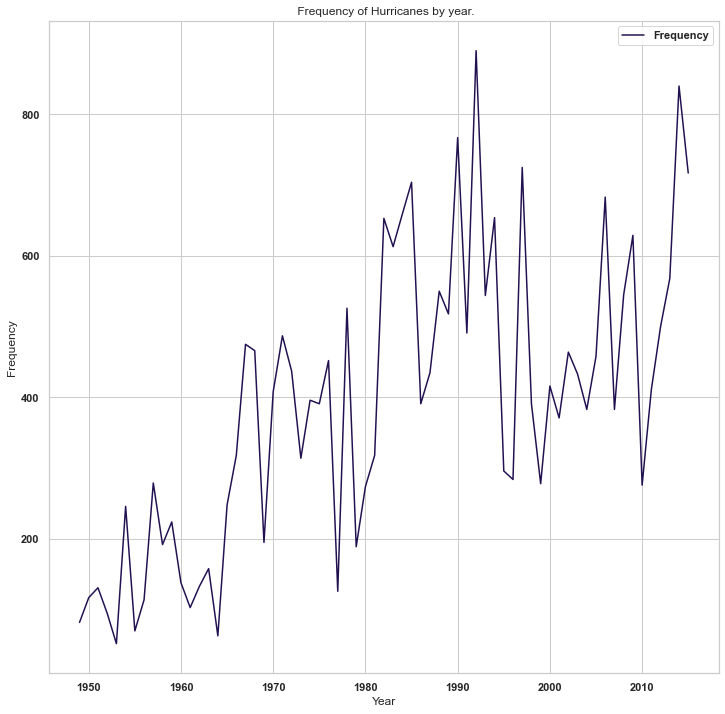

In [39]:
# Year-Wise Frequency of Hurricanes.
temp = data.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (12,12))
sns.lineplot(x = temp.index , y = 'Month' , data = temp , label = 'Frequency')
plt.ylabel('Frequency')
plt.title(' Frequency of Hurricanes by year.')
plt.show()

<AxesSubplot:xlabel='Probability Distribution of Frequency of Cyclones.', ylabel='Density'>

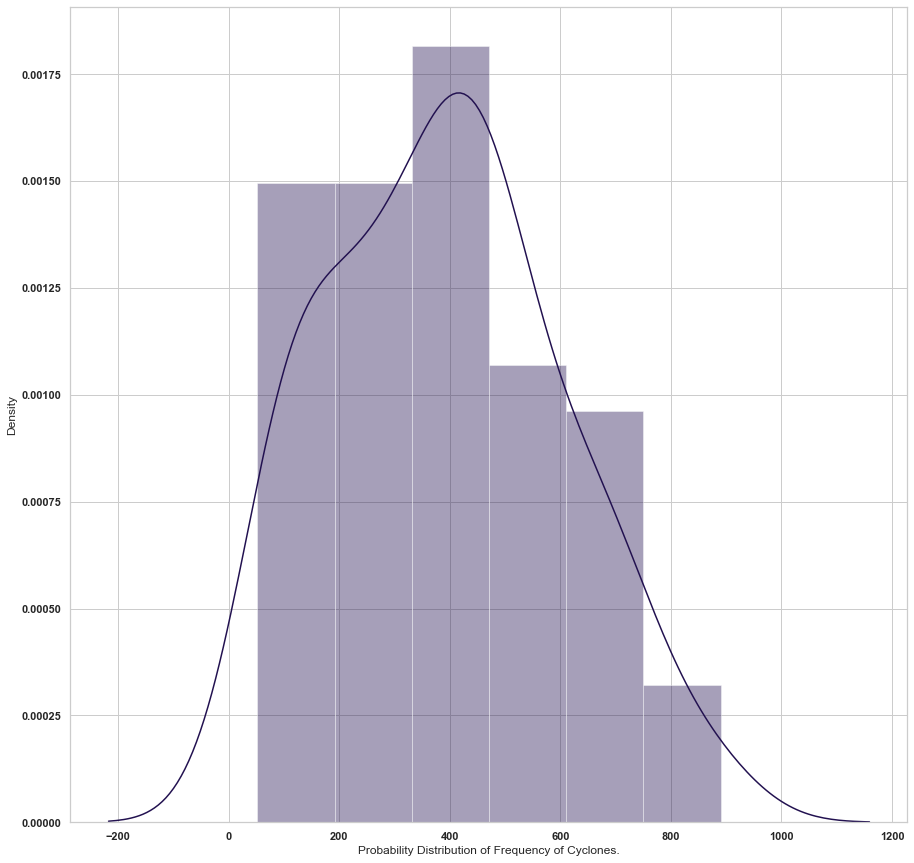

In [40]:
# Probability Distribution  of cyclone
temp = data.groupby('Year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')

# Bivariate analysis

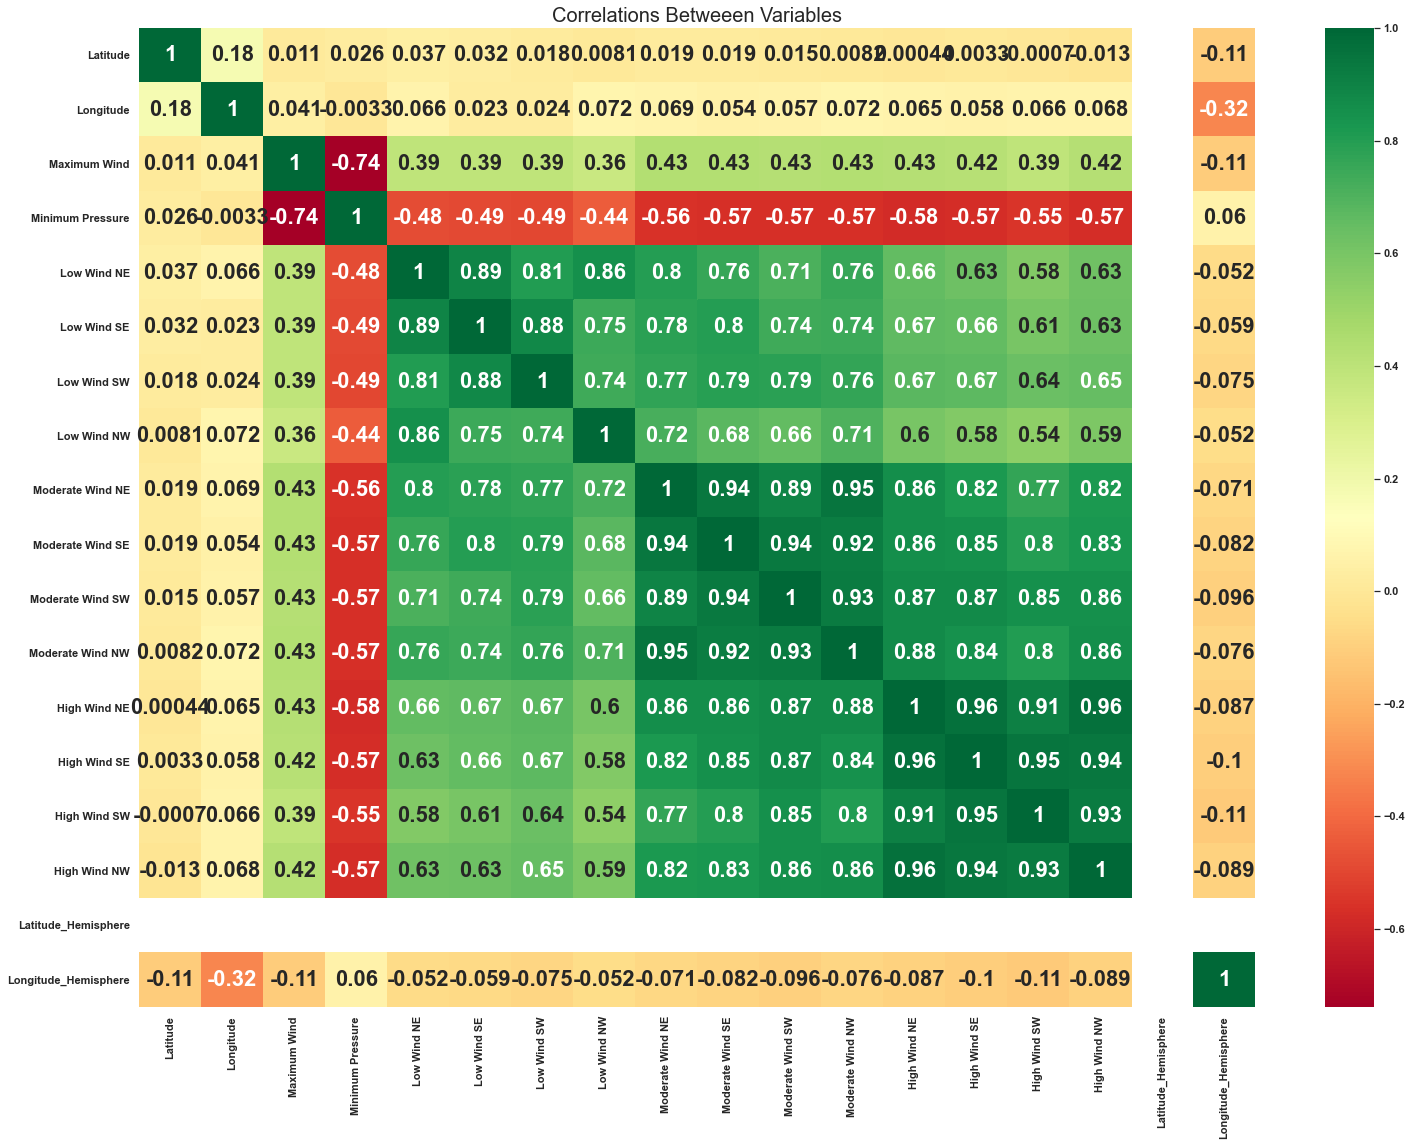

In [64]:
# pearson co relation 
plt.figure(figsize=(25,18))# fig size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")# plot heatmap in corelation values
plt.title("Correlations Betweeen Variables", size=20)# title
plt.show()# plot

## Data splitting

In [68]:
X = df.drop(['Status'],axis='columns') # assigning x
X.head(3) # display top 3

,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,20.2,106.3,45,995,40,35,27,35,13,11,9,11,5,4,3,5,0,1
1,20.2,106.4,45,995,40,35,27,35,13,11,9,11,5,4,3,5,0,1
2,20.2,106.7,45,995,40,35,27,35,13,11,9,11,5,4,3,5,0,1


In [69]:
y = df.Status# assigning y
y.head(3)#  display top 3 y variables

0    Tropical storm-34 to 63 knots
1    Tropical storm-34 to 63 knots
2    Tropical storm-34 to 63 knots
Name: Status, dtype: object

## Feature selection for Random Forest

In [70]:
from sklearn.model_selection import train_test_split # for train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) # splitting the data for train 0.7% and test 0.2%

In [71]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# First I want to determine the important features.
rf = RandomForestClassifier(oob_score=True , n_estimators=1000) # object for feature importance
rf.fit(X_train , y_train)# fitting the model
features = pd.Series(rf.feature_importances_ , index= X_train.columns).sort_values(ascending=False) # serier from higher value to low
features
# higher value is most important features to predict output, higher the value hiugher importance

Maximum Wind            0.687505
Minimum Pressure        0.117325
Latitude                0.030630
Longitude               0.029484
Low Wind NE             0.026594
Low Wind NW             0.020373
High Wind NE            0.016617
Low Wind SE             0.016374
Low Wind SW             0.012095
High Wind SE            0.010801
High Wind NW            0.008543
High Wind SW            0.006450
Moderate Wind SE        0.004835
Moderate Wind SW        0.004316
Moderate Wind NE        0.003588
Moderate Wind NW        0.003160
Longitude_Hemisphere    0.001310
Latitude_Hemisphere     0.000000
dtype: float64

In [72]:
features.index[0:6]
# take top 6 fro series to fit the model

Index(['Maximum Wind', 'Minimum Pressure', 'Latitude', 'Longitude',
       'Low Wind NE', 'Low Wind NW'],
      dtype='object')

# random forest algorithm

In [73]:
x_trainf = df[features.index[0:6]] # assigning x train
y_train = df['Status']# assigning y train


In [74]:
# train test split for importance features
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(x_trainf,y_train,test_size=0.2,random_state=20)

In [75]:
from sklearn.ensemble import RandomForestClassifier# imoport random forest model
model_rf = RandomForestClassifier(n_estimators=30) # random forest object
model_rf.fit(X_trains, y_trains)# fitting the model

RandomForestClassifier(n_estimators=30)

In [76]:
model_rf.score(X_tests, y_tests)# random forest score

0.983226058123659

In [77]:
y_predicted = model_rf.predict(X_tests)# getting y predicted values to test 

In [78]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_tests, y_predicted)
cm

array([[1349,    1,    0,   39],
       [   0, 2064,    0,    0],
       [   0,    0, 1317,    0],
       [  37,    9,    0,  311]], dtype=int64)

Text(66.5, 0.5, 'Truth')

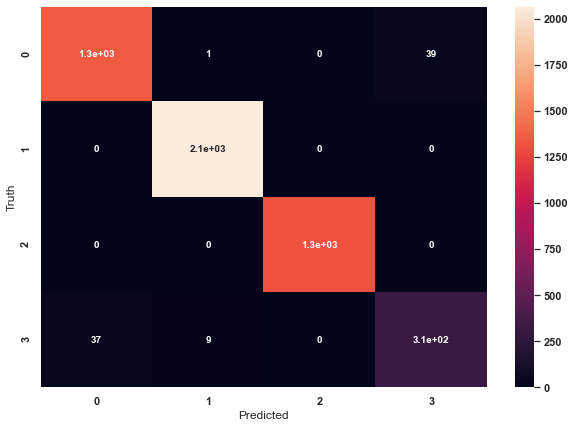

In [79]:
# plotting confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_tests, y_predicted))

                                 precision    recall  f1-score   support

Tropical depression-v< 34 knots       0.97      0.97      0.97      1389
  Tropical storm-34 to 63 knots       1.00      1.00      1.00      2064
          hurricane- > 64 knots       1.00      1.00      1.00      1317
                     no cyclone       0.89      0.87      0.88       357

                       accuracy                           0.98      5127
                      macro avg       0.96      0.96      0.96      5127
                   weighted avg       0.98      0.98      0.98      5127



In [81]:
# roc and auc score
from sklearn.metrics import roc_auc_score
y_probs_rf=model_rf.predict_proba(X_tests)
roc_auc_score(y_tests,y_probs_rf,average="weighted",multi_class="ovr")

0.9989007834611315

In [55]:
# log loss score 
# Log-loss is one of the major metrics to assess the performance of a classification problem.
from sklearn.metrics import log_loss
log_loss(y_tests,y_probs_rf) # lower the value is better the accuracy

0.07938583748813839

# Decision Tree Feature Selection

In [56]:
# decision tree feature importance

from sklearn.tree import DecisionTreeClassifier# decision tree classifier

# define the model
model = DecisionTreeClassifier()# object for decision tree
# fit the model
model.fit(X, y) # fitting 
features_dt=pd.Series(model.feature_importances_ , index= X_train.columns).sort_values(ascending=False)# make series of importance features
features_dt

Maximum Wind            0.870969
Low Wind SW             0.070789
Longitude               0.024548
Latitude                0.023850
Minimum Pressure        0.007915
Low Wind NE             0.000753
Low Wind SE             0.000400
Low Wind NW             0.000313
Longitude_Hemisphere    0.000234
Moderate Wind NE        0.000137
Moderate Wind SW        0.000092
High Wind SE            0.000001
Moderate Wind NW        0.000000
High Wind NE            0.000000
High Wind SW            0.000000
High Wind NW            0.000000
Latitude_Hemisphere     0.000000
Moderate Wind SE        0.000000
dtype: float64

In [57]:
print("Top six Features for Decision Tree:",features_dt.index[0:6]) # getting top 6 imp[ortance features]

Top six Features for Decision Tree: Index(['Maximum Wind', 'Low Wind SW', 'Longitude', 'Latitude',
       'Minimum Pressure', 'Low Wind NE'],
      dtype='object')


# Decision Tree Algorithum

In [58]:
x_traindt = df[features_dt.index[0:6]]# assigning top 6 for xtrain
y_train = df['Status']# assigning y train

In [59]:
from sklearn.model_selection import train_test_split# splitting the data for decision tree
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(x_traindt,y_train,test_size=0.2,random_state=10)

In [60]:
from sklearn.model_selection import GridSearchCV # gridsearch cv hyperparameter tunuing 
params = {
    'max_depth': [2, 3, 5, 10, 20],# maximum depth
    'min_samples_leaf': [5, 10, 20, 50, 100],# min number of leaf
    'criterion': ["gini", "entropy"]# criteria either gini, or entropy
}
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1)
%time
grid_search.fit(X_traindt, y_traindt)

Wall time: 0 ns
Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=1)

In [61]:
grid_search.best_estimator_# best estimator

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [62]:
models_dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5) # assigning  decision tree with best parameter
models_dt.fit(X_traindt, y_traindt)# fitting the model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [63]:
models_dt.score(X_testdt, y_testdt)# model score 

0.9769845913789741

In [64]:
y_pred_dt = models_dt.predict(X_testdt)

In [65]:
cm_dt = confusion_matrix(y_testdt, y_pred_dt)
cm_dt

array([[1261,    0,    0,   33],
       [   0, 2054,    0,    1],
       [   0,    0, 1383,    0],
       [  79,    5,    0,  311]], dtype=int64)

Text(66.5, 0.5, 'Truth')

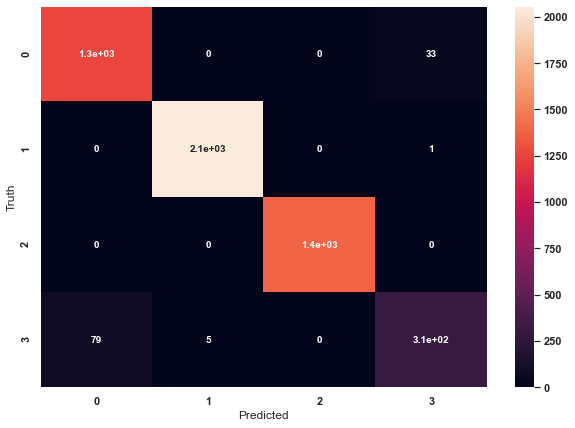

In [66]:
# confusion matrix visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_dt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_testdt, y_pred_dt))

                                 precision    recall  f1-score   support

Tropical depression-v< 34 knots       0.94      0.97      0.96      1294
  Tropical storm-34 to 63 knots       1.00      1.00      1.00      2055
          hurricane- > 64 knots       1.00      1.00      1.00      1383
                     no cyclone       0.90      0.79      0.84       395

                       accuracy                           0.98      5127
                      macro avg       0.96      0.94      0.95      5127
                   weighted avg       0.98      0.98      0.98      5127



In [68]:
# auc and roc score, high percentage is reliable model
from sklearn.metrics import roc_auc_score
y_probs_dt=models_dt.predict_proba(X_tests)
roc_auc_score(y_tests,y_probs_dt,average="weighted",multi_class="ovr")

0.9785787853982099

In [69]:
# find loss score for decision tree model
from sklearn.metrics import log_loss# import library
log_loss(y_testdt,y_probs_dt) # lower the value is better the accuracy

22.886987724823843

# Principal Component Analysis

In [ ]:
#PCA is an unsupervised statistical technique that is used to reduce the dimensions of the dataset.
#ML models with many input variables or higher dimensionality tend to fail when operating on a higher input dataset. 

In [70]:
from sklearn.preprocessing import StandardScaler # scaling 
from sklearn.decomposition import PCA# PCA for dimenislity reduction

In [71]:
X_pca = df.drop(['Status'],axis='columns') # assigning value for scaling
y_pca = df.Status# assigning y value

In [72]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_scaled = StandardScaler().fit_transform(X_pca)# standard scalar 0 to 1
from sklearn.model_selection import train_test_split # train test split after scaling
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_scaled,y_pca,test_size=0.2,random_state=42)


In [73]:
pca = PCA(2)# giving 2 columns for pca
X_pca = pca.fit_transform(X_pca) # transform 
X_pca.shape# getting shape

(25634, 2)

In [74]:
# amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.
print("**************************************************************************************")
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print("**************************************************************************************")

**************************************************************************************
Explained variation per principal component: [0.61873091 0.14880938]
**************************************************************************************


In [75]:
pca.n_components_

2

In [76]:
X_pca

array([[ -2.41883468,   3.61731087],
       [ -2.41615017,   3.6172763 ],
       [ -2.40809664,   3.61717257],
       ...,
       [-76.92259779,  -6.52255757],
       [-78.70369395,  -1.84585005],
       [-80.47874414,   2.83150949]])

In [77]:
# dataframe of pca component with target
principal_Df = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])
principal_Df["y"]= y_train_pca# merge y with pca component datframe
principal_Df

,principal component 1,principal component 2,y
0,-2.418835,3.617311,Tropical storm-34 to 63 knots
1,-2.416150,3.617276,Tropical storm-34 to 63 knots
2,-2.408097,3.617173,Tropical storm-34 to 63 knots
3,-2.381026,3.617067,Tropical storm-34 to 63 knots
4,-2.356640,3.616996,Tropical storm-34 to 63 knots
...,...,...,...
25629,-45.773475,0.706591,no cyclone
25630,-76.733271,-6.815544,no cyclone
25631,-76.922598,-6.522558,no cyclone
25632,-78.703694,-1.845850,NaN


<Figure size 432x288 with 0 Axes>

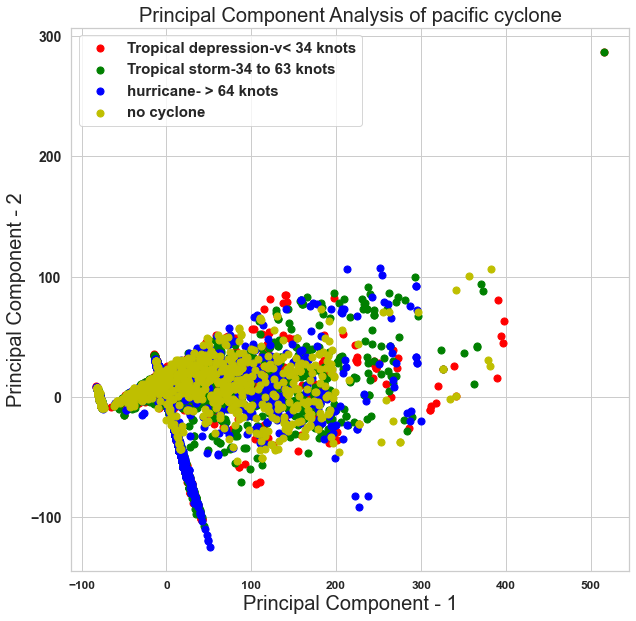

In [78]:
# plotting the cyclone with pca1 in y and pca2 in x axis
# now we can spot the types of cyclone
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of pacific cyclone",fontsize=20)
targets = ['Tropical depression-v< 34 knots', 'Tropical storm-34 to 63 knots',"hurricane- > 64 knots","no cyclone"]
colors = ['r', 'g',"b","y"]
for target, color in zip(targets,colors):
    indicesToKeep = principal_Df['y'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

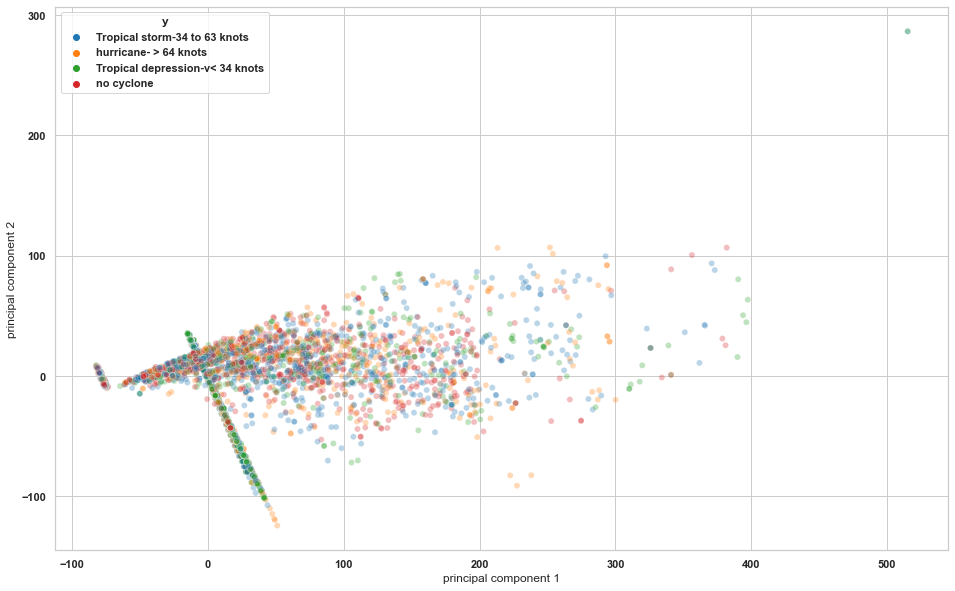

In [79]:
# plot in seborn to better understand
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("tab10", 4),
    data=principal_Df,
    legend="full",
    alpha=0.3)

In [80]:
# drop null if any
principal_Df.isnull().value_counts()
principal_Df.dropna()

,principal component 1,principal component 2,y
0,-2.418835,3.617311,Tropical storm-34 to 63 knots
1,-2.416150,3.617276,Tropical storm-34 to 63 knots
2,-2.408097,3.617173,Tropical storm-34 to 63 knots
3,-2.381026,3.617067,Tropical storm-34 to 63 knots
4,-2.356640,3.616996,Tropical storm-34 to 63 knots
...,...,...,...
25628,1.484691,13.461733,no cyclone
25629,-45.773475,0.706591,no cyclone
25630,-76.733271,-6.815544,no cyclone
25631,-76.922598,-6.522558,no cyclone


In [83]:
x_log=principal_Df[["principal component 1","principal component 2"]]
y_log=principal_Df["y"]

In [84]:
y_log.head()

0    Tropical storm-34 to 63 knots
1    Tropical storm-34 to 63 knots
2    Tropical storm-34 to 63 knots
3    Tropical storm-34 to 63 knots
4    Tropical storm-34 to 63 knots
Name: y, dtype: object

In [85]:
# train test split for logistics regression
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_log,y,test_size=0.2,random_state=42)
# 20 % for test and 80% for train

In [86]:
# import logistics regression multinominal
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class='multinomial', solver='lbfgs')# multinominal for multi class classification
log.fit(X_train_log, y_train_log)# fitting

LogisticRegression(multi_class='multinomial')

In [87]:
log.score(X_test_log, y_test_log)# getting score of logistics regression with Using PCA

0.95006826604252

In [89]:
y_pred_log= log.predict(X_test_log)# assigning y predict

In [90]:
# confuction metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_log, y_pred_log)
cm

array([[1321,   10,    0,   69],
       [  96, 1910,    4,    0],
       [   0,    0, 1340,    0],
       [  74,    3,    0,  300]], dtype=int64)

Text(66.5, 0.5, 'Truth')

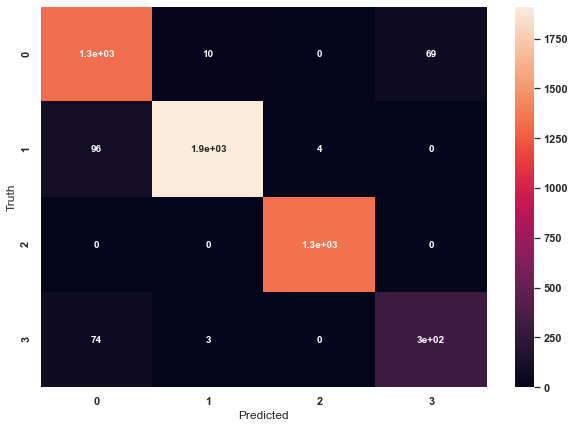

In [91]:
# plotting confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_log, y_pred_log))

                                 precision    recall  f1-score   support

Tropical depression-v< 34 knots       0.89      0.94      0.91      1400
  Tropical storm-34 to 63 knots       0.99      0.95      0.97      2010
          hurricane- > 64 knots       1.00      1.00      1.00      1340
                     no cyclone       0.81      0.80      0.80       377

                       accuracy                           0.95      5127
                      macro avg       0.92      0.92      0.92      5127
                   weighted avg       0.95      0.95      0.95      5127



In [96]:
# roc and auc score
from sklearn.metrics import roc_auc_score
y_probs_log=log.predict_proba(X_test_log)
roc_auc_score(y_test_log,y_probs_log,average="weighted",multi_class="ovr")# one vs rest

0.9916323477631526

In [97]:
# loss log for getting losess in training
# Log-loss is one of the major metrics to assess the performance of a classification problem.
from sklearn.metrics import log_loss
log_loss(y_test_log,y_probs_log) # lower the value is better the accuracy

0.1639803720231126

In [85]:
# conclusion
#1 logistics regression with using PCA - 
# Accuracy - 0.95
# roc score - 0.99
# loss   -     0.16

#2 decision tree classifier using hyperparameter tuning
# Accuracy --    0.97
# roc score --   0.97
# loss--   0.22

#3 random forest
# accuracy - 0.98
# roc score - 0.99
# loss- 0.07